In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
# read the dataset
data = pd.read_csv('../input/museums.csv')

# summarize the dataset
data.describe()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,14,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Museum ID,Zip Code (Physical Location),Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Tax Period,Income,Revenue
count,3.307200e+04,9221.000000,33007.000000,33007.000000,32995.000000,30536.000000,33071.000000,33072.000000,23280.000000,2.296100e+04,2.229000e+04
mean,8.403812e+09,47805.644616,38.925372,-90.816757,2.505834,85.701926,29.065828,3.670083,201347.458548,1.069682e+08,2.097605e+07
std,2.662542e+06,30210.265032,5.126213,16.489087,1.211841,105.668318,15.431254,1.539274,67.670742,2.509287e+09,2.485197e+08
min,8.400100e+09,1002.000000,0.000000,-166.541260,1.000000,1.000000,1.000000,1.000000,199906.000000,-9.230000e+02,-2.127393e+06
25%,8.401801e+09,20180.000000,35.567720,-97.651155,1.000000,25.000000,17.000000,2.000000,201312.000000,0.000000e+00,0.000000e+00
50%,8.403600e+09,47448.000000,39.831640,-86.776840,2.000000,61.000000,29.000000,4.000000,201312.000000,8.781000e+03,3.307000e+03
75%,8.404801e+09,74743.000000,42.237490,-77.616930,4.000000,109.000000,42.000000,5.000000,201408.000000,2.163770e+05,1.676960e+05
max,8.409504e+09,99901.000000,70.669760,0.000000,4.000000,840.000000,90.000000,6.000000,201504.000000,8.318144e+10,5.840349e+09


In [3]:
# list all different `Museum Type`
data['Museum Type'].value_counts()

HISTORIC PRESERVATION                            14861
GENERAL MUSEUM                                    8699
ART MUSEUM                                        3241
HISTORY MUSEUM                                    2284
ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER     1484
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM        1081
ZOO, AQUARIUM, OR WILDLIFE CONSERVATION            564
CHILDREN'S MUSEUM                                  512
NATURAL HISTORY MUSEUM                             346
Name: Museum Type, dtype: int64

In [4]:
# split the data into zoo and other museums
zoos = data[data['Museum Type'] == 'ZOO, AQUARIUM, OR WILDLIFE CONSERVATION']
museums = data[data['Museum Type'] != 'ZOO, AQUARIUM, OR WILDLIFE CONSERVATION']

zoosRevenue = zoos['Revenue'].dropna().drop_duplicates()
museumsRevenue = museums['Revenue'].dropna().drop_duplicates()

# apply log normalization
zoosRevenue = zoosRevenue.apply(np.log)
museumsRevenue = museumsRevenue.apply(np.log)

zoosRevenue = zoosRevenue[zoosRevenue > 0]
museumsRevenue = museumsRevenue[museumsRevenue > 0]

zoosRevenue.head()

19     14.688371
109    13.189831
125    16.063555
205    12.996126
254    16.005199
Name: Revenue, dtype: float64

In [5]:
# perform t-test on revenue
ttest_ind(zoosRevenue, zoosRevenue, equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

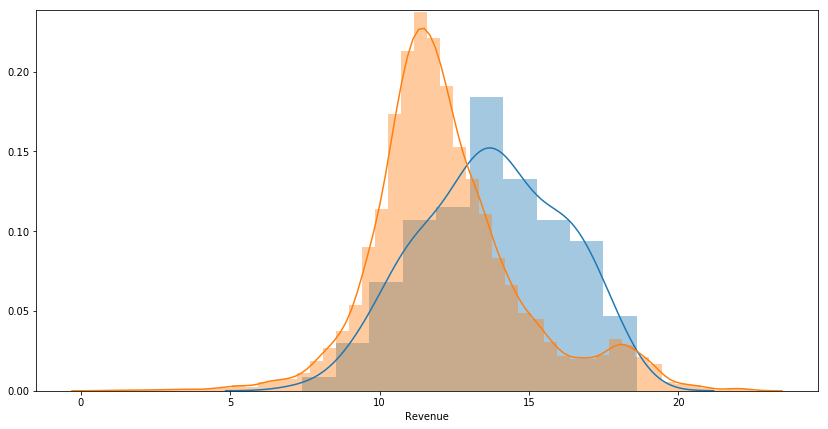

In [6]:
plt.figure(figsize=(14, 7))
sns.distplot(zoosRevenue)
sns.distplot(museumsRevenue)